<a href="https://colab.research.google.com/github/ucfilho/ANN/blob/master/ANN_2022/Image_08/Class_008_object_detection_000_Finding_Waldo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Matching

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!git clone https://github.com/ucfilho/Machine_Learning_DataSet
%cd Machine_Learning_DataSet

Cloning into 'Machine_Learning_DataSet'...
remote: Enumerating objects: 165, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 165 (delta 30), reused 56 (delta 20), pack-reused 75
Receiving objects: 100% (165/165), 58.28 MiB | 30.34 MiB/s, done.
Resolving deltas: 100% (53/53), done.
/content/Machine_Learning_DataSet/Machine_Learning_DataSet


In [ ]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [ ]:
waldo =  cv2.imread('waldo.jpg',0)

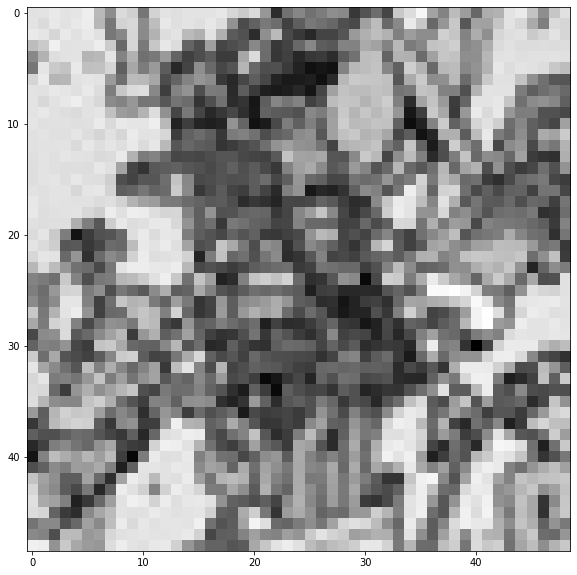

In [ ]:
display(waldo)

In [ ]:
WaldoBeach = cv2.imread('WaldoBeach.jpg',0)

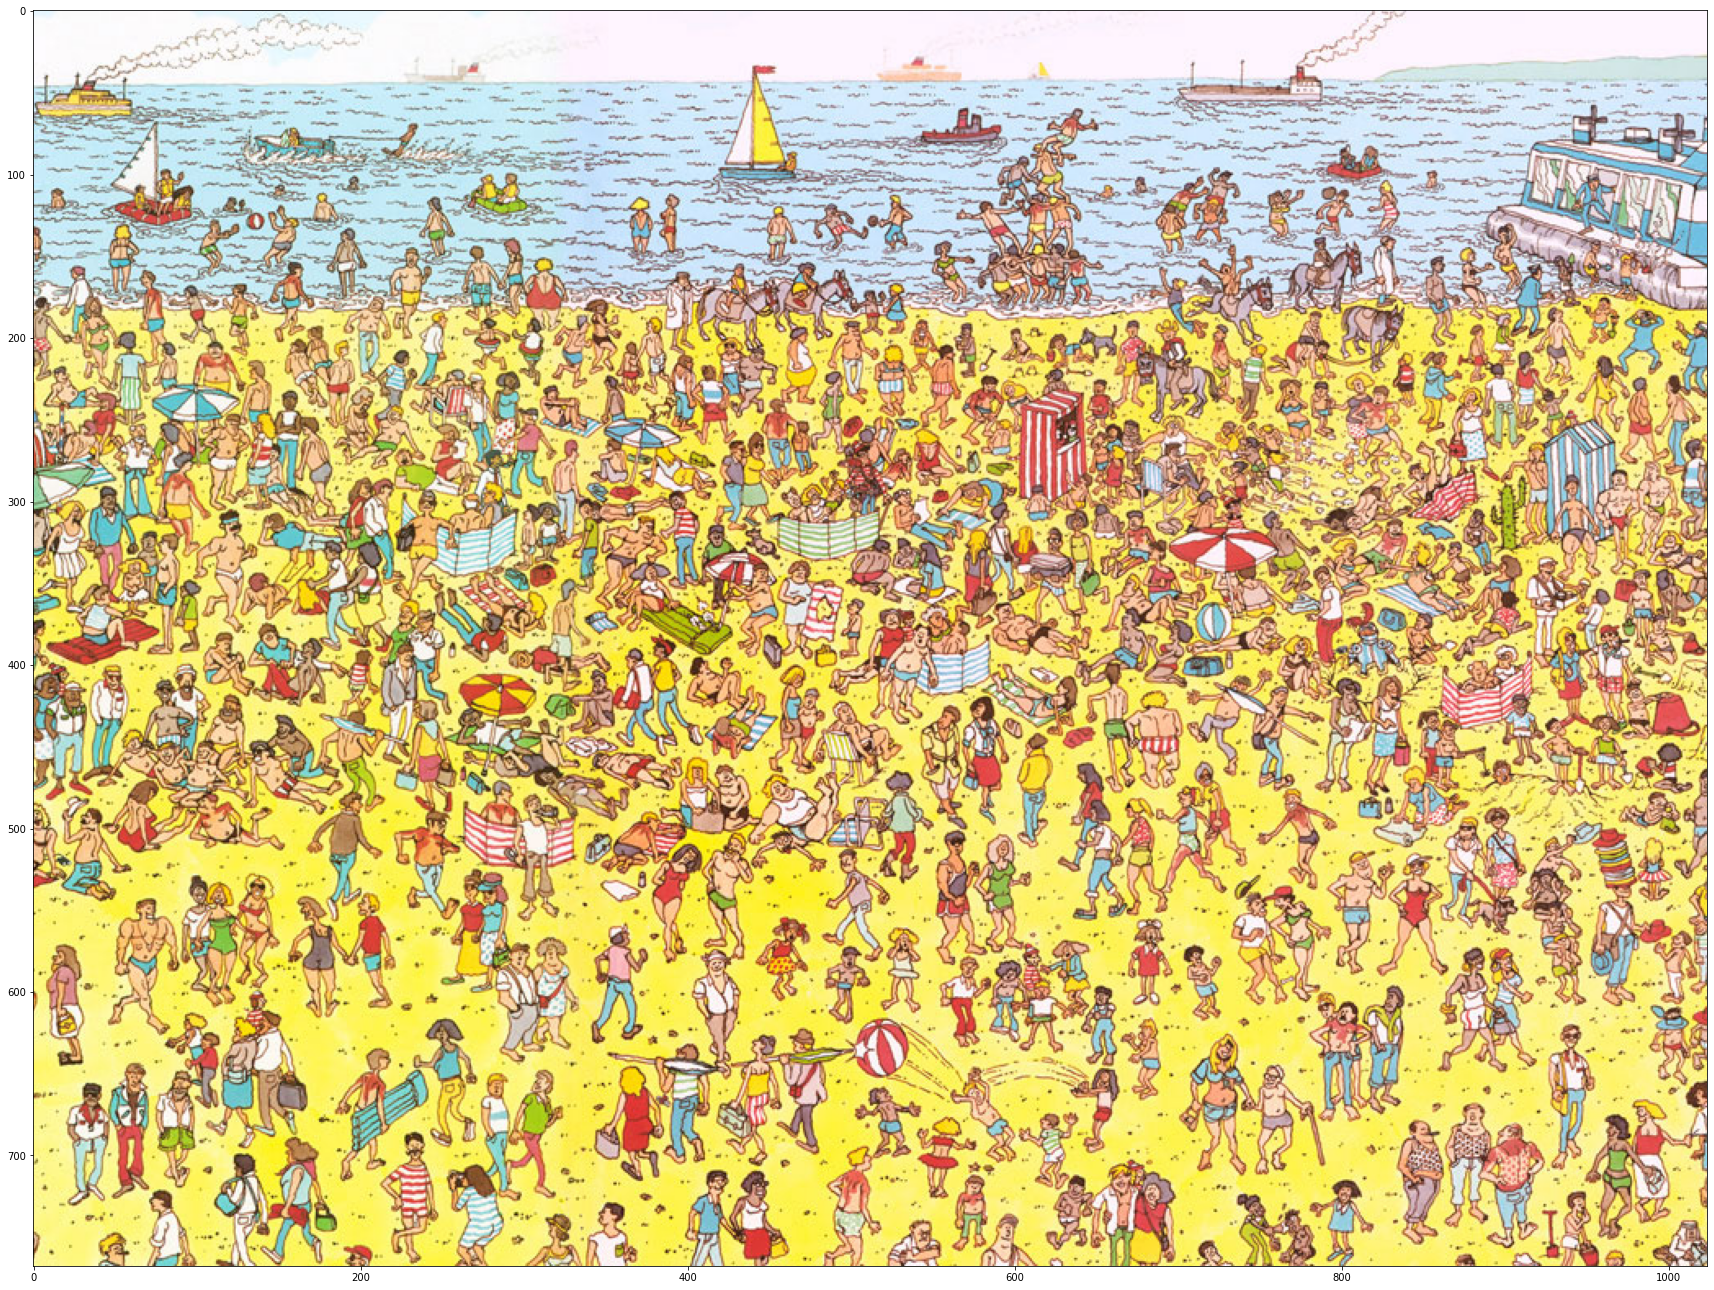

In [ ]:
plt.figure(figsize=(30, 30))
plt.imshow(cv2.cvtColor(cv2.imread('WaldoBeach.jpg'), cv2.COLOR_BGR2RGB))

--------
# Brute Force Detection with ORB Descriptors

In [ ]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(waldo,None)
kp2, des2 = orb.detectAndCompute(WaldoBeach,None)

# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 25 matches.
waldo_matches = cv2.drawMatches(waldo,kp1,WaldoBeach,kp2,matches[:25],None,flags=2)

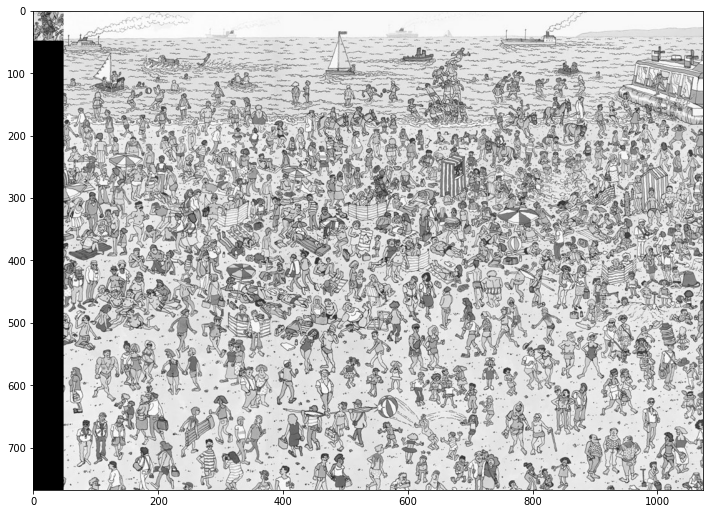

In [ ]:
display(waldo_matches)

# Brute-Force Matching with SIFT Descriptors and Ratio Test

In [ ]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(waldo,None)
kp2, des2 = sift.detectAndCompute(WaldoBeach,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=2)

# Apply ratio test
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(waldo,kp1,WaldoBeach,kp2,good,None,flags=2)

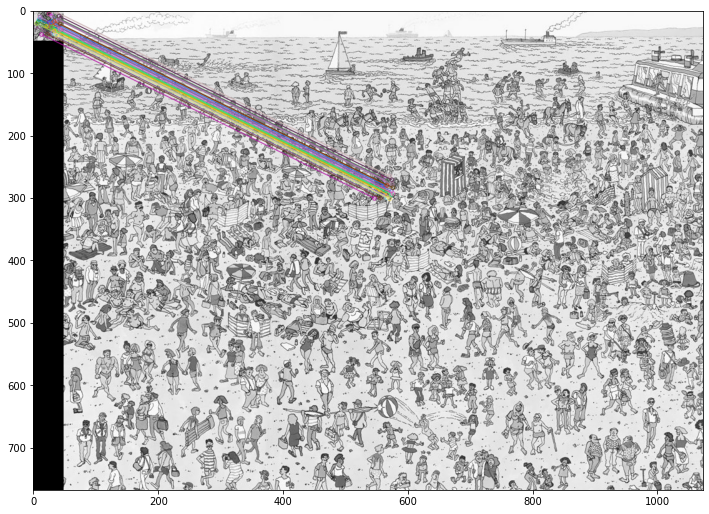

In [ ]:
display(sift_matches)

# FLANN based Matcher

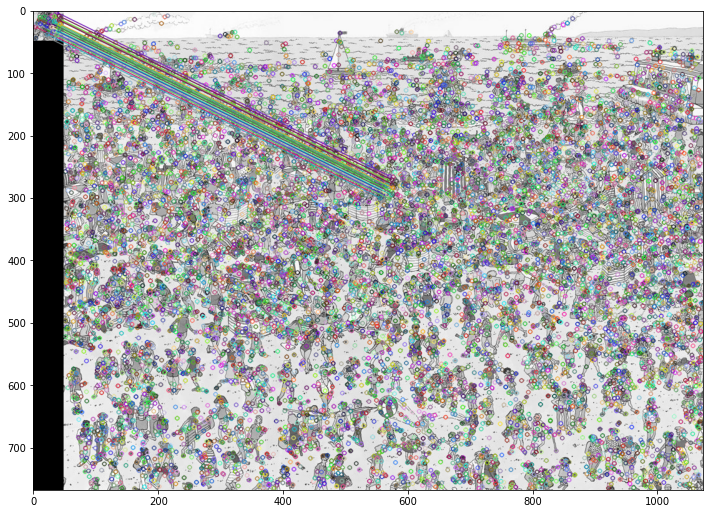

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(waldo,None)
kp2, des2 = sift.detectAndCompute(WaldoBeach,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(waldo,kp1,WaldoBeach,kp2,good,None,flags=0)

display(flann_matches)

In [ ]:
des1

array([[33., 25.,  7., ...,  1., 44., 31.],
       [ 7.,  7.,  6., ...,  0.,  1., 42.],
       [21., 43., 79., ...,  0.,  0.,  0.],
       ...,
       [ 1.,  2.,  3., ...,  1.,  3., 13.],
       [66., 24.,  4., ..., 58.,  0.,  0.],
       [ 2., 46., 34., ...,  4.,  0.,  5.]], dtype=float32)

In [ ]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(waldo,None)
kp2, des2 = sift.detectAndCompute(WaldoBeach,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i]=[1,0]

draw_params = dict(matchColor = (0,255,0),
                   singlePointColor = (255,0,0),
                   matchesMask = matchesMask,
                   flags = 0)

flann_matches = cv2.drawMatchesKnn(waldo,kp1,WaldoBeach,kp2,matches,None,**draw_params)

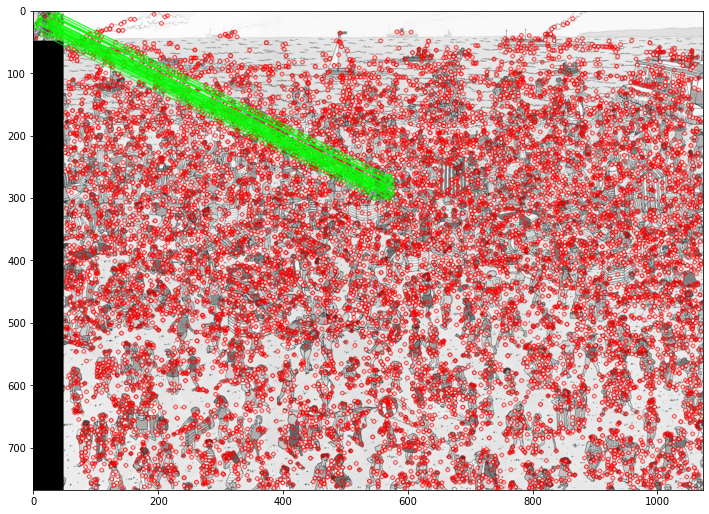

In [ ]:
display(flann_matches)